# Problems: 
1) logins.json file contains timestamps of user logins; aggregate to 15min intervals; visualize and describe patterns of the demand

2) Illustrate important features of the demand, such as daily cycles

3) Report data quality issues

# Approach:
1) add dummy columns of ones for aggregating to 15min intervals

2) convert to datetime index; aggregate

3) visualize with df.iloc from time x to time y to zoom in or out of analomies or patterns

# Results:
1) Overall, later months seem busier although we don't have all the data for April (only 13 days)

2) For the weekdays and weekends, generally noon and midnight are peak hours for logins

3) Weekends are busier than weekdays

4) Login tracker doesn't seem to always work as sudden drops to 0 logins are found during busy times

In [1]:
# for data manipulation
import pandas as pd
import numpy as np
import os
import json
import calendar 
from datetime import datetime

# For graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [2]:
with open("logins.json", "r") as read_file:
    data = json.load(read_file)

In [3]:
df = pd.DataFrame(data)
df.head(3)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null object
dtypes: object(1)
memory usage: 727.8+ KB


In [5]:
df["date_time"] = pd.to_datetime(df.login_time, infer_datetime_format=True)
df.head(3)
# verify that dates were correctly parsed

,login_time,date_time
0,1970-01-01 20:13:18,1970-01-01 20:13:18
1,1970-01-01 20:16:10,1970-01-01 20:16:10
2,1970-01-01 20:16:37,1970-01-01 20:16:37


In [6]:
df["date_time"] = df.sort_values(by = 'date_time').date_time
df["dummy"] = 1

In [7]:
df.head(3)

,login_time,date_time,dummy
0,1970-01-01 20:13:18,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1970-01-01 20:16:37,1


In [8]:
df.tail(3)

,login_time,date_time,dummy
93139,1970-04-13 18:54:02,1970-04-13 18:54:02,1
93140,1970-04-13 18:57:38,1970-04-13 18:57:38,1
93141,1970-04-13 18:54:23,1970-04-13 18:54:23,1


# we're dealing with data for 3 full months (Jan - Mar), plus 13 days of April

In [9]:
# For Aesthetics
font = {'size' : 24}
mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = (16.0, 6.0) ### (→ , ↑) ###

In [10]:
#df = pd.DataFrame(df)
df = df.drop(["login_time"], axis = 1)
df = df.set_index("date_time")
df = df.resample('15Min').sum()

In [11]:
df.head(3)

,dummy
date_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9


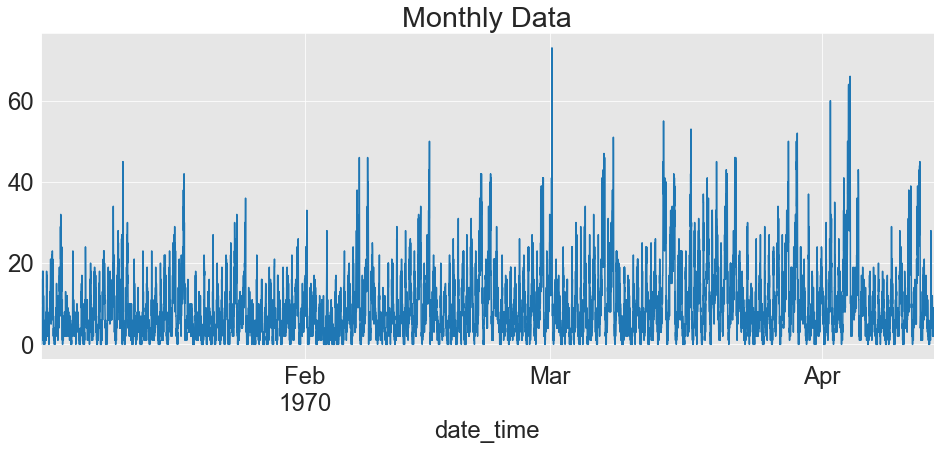

In [12]:
ax = df.plot()
ax.legend_ = None
plt.title("Monthly Data")
plt.show()

# seems march and april are particularly busy; having zero values at any point in time is suspicious as logins are done are random times, but having no logins at all could indicate a computational error (caveat: it could also indicate maintenance)

# next, let's zoom in on January first

Jan 12th =  Monday
Jan 19th =  Monday
Jan 26th =  Monday


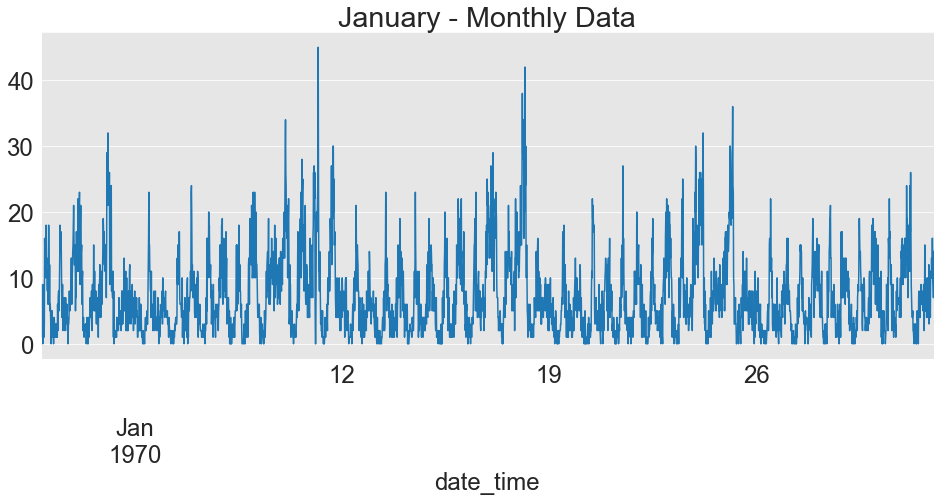

In [13]:
def find_day(date): 
    born = datetime.strptime(date, '%d %m %Y').weekday() 
    return (calendar.day_name[born]) 

print("Jan 12th = ", find_day('12 01 1970'))
print("Jan 19th = ", find_day('19 01 1970'))
print("Jan 26th = ", find_day('26 01 1970'))

# January Analysis
ax = df.loc[df.index.month == 1].plot()
ax.legend_ = None
plt.title("January - Monthly Data")
plt.show()

# weekends are particularly busy; something odd about the sudden dip on the 11th; let's examine

Jan 11 =  Sunday


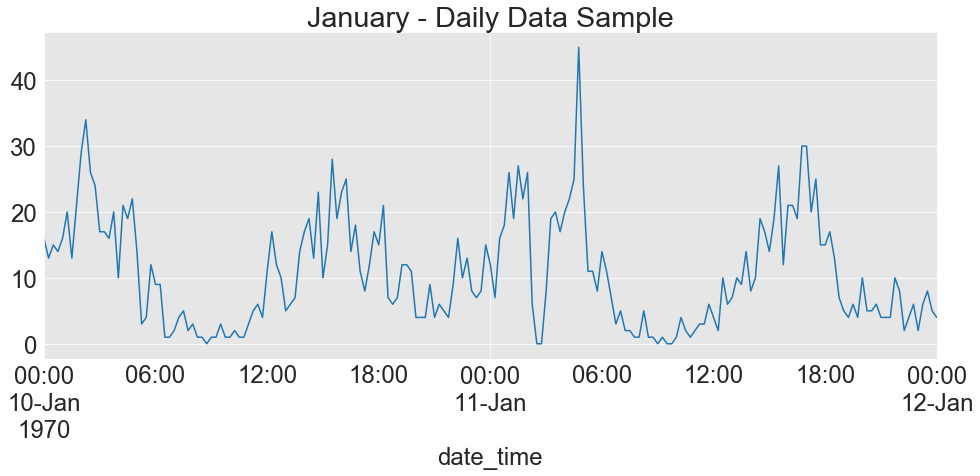

In [14]:
print("Jan 11 = ", find_day('11 01 1970'))

# January Analysis
x = datetime(1970, 1, 10)
y = datetime(1970, 1, 12)

ax = df.loc[x:y].plot()
ax.legend_ = None
plt.title("January - Daily Data Sample")
plt.show()

# as suspected, there may be something wrong with the logger that tracks logins as a sudden drop like the one occurring on Jan 11th at 2am is not in line with the data around it

# peak hours are midnight to 6am, and noon to 6pm.

# Skipping February since it mimics January and for brevity; Let's examine March

Mar 1 =  Sunday
Mar 9 =  Monday
Mar 16 =  Monday
Mar 23 =  Monday


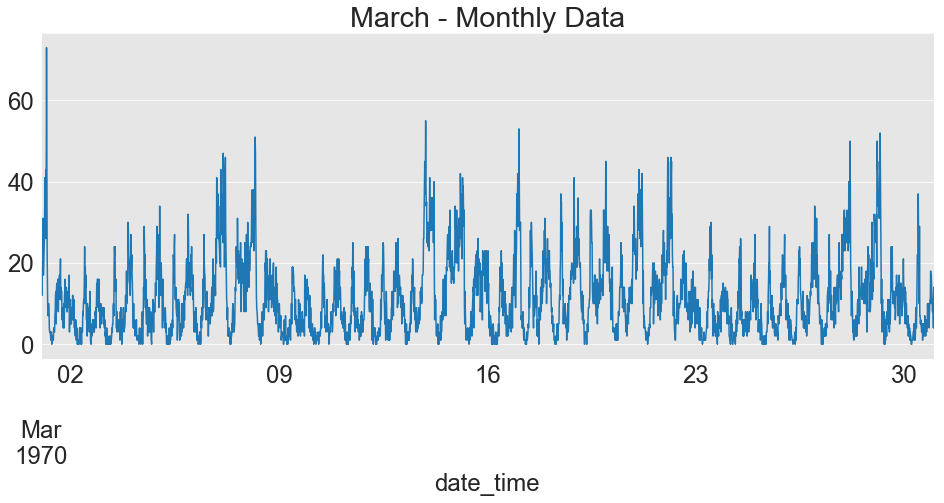

In [15]:
print("Mar 1 = ", find_day('01 03 1970'))
print("Mar 9 = ", find_day('09 03 1970'))
print("Mar 16 = ", find_day('16 03 1970'))
print("Mar 23 = ", find_day('23 03 1970'))

# March Analysis
x = datetime(1970, 3, 1)
y = datetime(1970, 3, 31)

ax = df.loc[x:y].plot()
ax.legend_ = None
plt.title("March - Monthly Data")
plt.show()

# just like January, peak time are the weekends; 16th to the 21rd are particularly busy compared to other weekdays

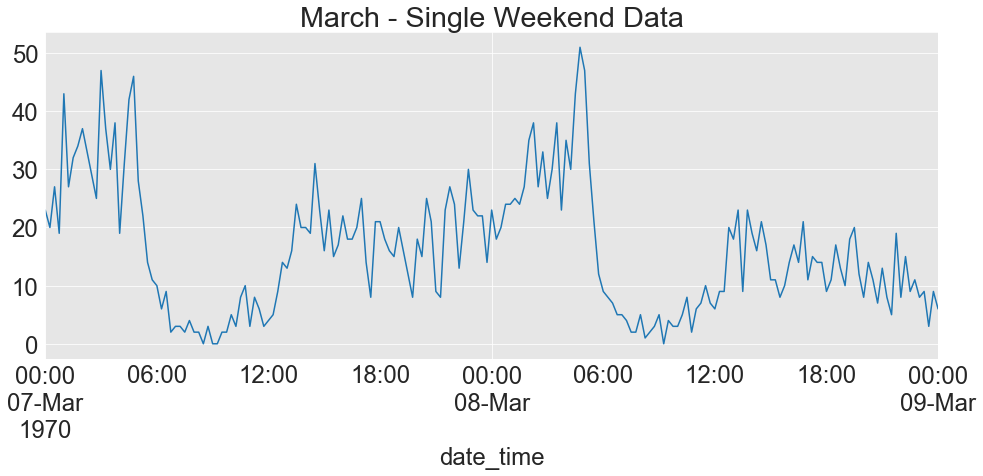

In [16]:
# March Analysis
x = datetime(1970, 3, 7)
y = datetime(1970, 3, 9)

ax = df.loc[x:y].plot()
ax.legend_ = None
plt.title("March - Single Weekend Data")
plt.show()

# Just like in January, peak times are midnight to 6:00am; noon to 6pm for March is not as stable as was the case in January

Mar 13 =  Friday


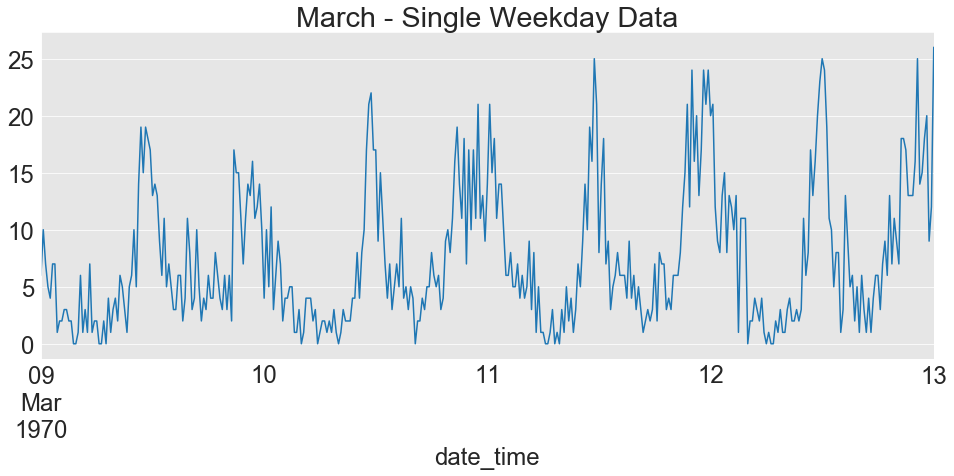

In [17]:
print("Mar 13 = ", find_day('13 03 1970'))

# March Analysis
x = datetime(1970, 3, 9)
y = datetime(1970, 3, 13)

ax = df.loc[x:y].plot()
ax.legend_ = None
plt.title("March - Single Weekday Data")
plt.show()

# for the weekdays, the pattern is similar - higher activity around noon and midnight